In [3]:
pip install requests pandas beautifulsoup4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.by import By

In [10]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline
# 사용자 운영체제 확인
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [5]:
# 선수 순위 표 크롤링

def get_records(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.content
    else:
        print(f"Failed to fetch data from {url}")
        return None

def parse_records(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    table = soup.find('table')
    headers = [header.text.strip() for header in table.find_all('th')]
    data_rows = []
    for row in table.find_all('tr')[1:]:
        data_rows.append([cell.text.strip() for cell in row.find_all('td')])
    return headers, data_rows

def save_as_csv(headers, data_rows, filename):
    df = pd.DataFrame(data_rows, columns=headers)
    df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")

if __name__ == "__main__":
    # URL for batter records and pitcher records on the KBO homepage
    batter_url = "https://www.koreabaseball.com/Record/Player/HitterBasic/Basic1.aspx"
    pitcher_url = "https://www.koreabaseball.com/Record/Player/PitcherBasic/Basic1.aspx"

    # Get batter records
    batter_html_content = get_records(batter_url)
    if batter_html_content:
        batter_headers, batter_data = parse_records(batter_html_content)
        save_as_csv(batter_headers, batter_data, "batter_records.csv")

    # Get pitcher records
    pitcher_html_content = get_records(pitcher_url)
    if pitcher_html_content:
        pitcher_headers, pitcher_data = parse_records(pitcher_html_content)
        save_as_csv(pitcher_headers, pitcher_data, "pitcher_records.csv")

Data saved to batter_records.csv
Data saved to pitcher_records.csv


In [6]:
batter_rec = pd.read_csv('batter_records.csv')
batter_rec

,순위,선수명,팀명,AVG,G,PA,AB,R,H,2B,3B,HR,TB,RBI,SAC,SF
0,1,에레디아,SSG,0.339,76,324,295,43,100,17,0,10,147,56,1,0
1,2,양의지,두산,0.335,75,299,248,31,83,16,0,8,123,40,0,3
2,3,홍창기,LG,0.332,80,373,301,59,100,25,2,0,129,38,3,3
3,4,손아섭,NC,0.331,75,333,302,46,100,23,3,2,135,45,1,5
4,5,김혜성,키움,0.324,85,375,339,64,110,19,3,5,150,35,0,3
5,6,노시환,한화,0.317,78,354,309,51,98,18,0,19,173,57,0,2
6,7,이정후,키움,0.312,83,378,324,49,101,23,2,6,146,44,0,5
7,8,문성주,LG,0.311,77,322,273,48,85,10,3,1,104,28,3,2
8,9,최정,SSG,0.311,73,314,267,64,83,14,0,19,154,58,1,5
9,10,박민우,NC,0.311,63,264,235,34,73,10,1,1,88,24,1,2


## 크롤링 -> to csv

In [71]:
# 선수 경기 별 기록 크롤링 -> to csv

def get_game_by_game_records(player_code):
    player_url = f"https://www.koreabaseball.com/Record/Player/HitterDetail/Game.aspx?playerId={player_code}"
    response = requests.get(player_url)
    if response.status_code == 200:
        return response.content
    else:
        print(f"Failed to fetch game-by-game records for player code: {player_code}")
        return None

def parse_game_by_game_records(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    h5_elements = soup.find_all('div', {'class': 'tbl-type02 mb35'})
    if not h5_elements:
        print("No game-by-game records found.")
        return None

    dataframes = []
    for h5_element in h5_elements:
        table = h5_element.find_next('table')
        if not table:
            continue

        headers = [header.text.strip() for header in table.find_all('th')]
        data_rows = []
        for row in table.find_all('tr')[1:]:
            data_row = [cell.text.strip() for cell in row.find_all('td')]
            data_rows.append(data_row)

        df = pd.DataFrame(data_rows, columns=headers)
        dataframes.append(df) 

    return dataframes

def save_as_csv(dataframes, filename):
    combined_df = pd.concat(dataframes, ignore_index=True)
    combined_df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")

if __name__ == "__main__":
    player_code = input("Enter the player code: ")
    
    game_by_game_records_html = get_game_by_game_records(player_code)
    if game_by_game_records_html:
        dataframes = parse_game_by_game_records(game_by_game_records_html)
        if dataframes:
            save_as_csv(dataframes, f"{player_code}경기별기록.csv")

Enter the player code:  72443


Data saved to 72443경기별기록.csv


In [72]:
# 선수 상황 별 기록 크롤링 -> to csv

def get_situation_by_game_records(player_code):
    player_url = f"https://www.koreabaseball.com/Record/Player/HitterDetail/Situation.aspx?playerId={player_code}"
    response = requests.get(player_url)
    if response.status_code == 200:
        return response.content
    else:
        print(f"Failed to fetch situation-by-game records for player code: {player_code}")
        return None

def parse_situation_by_game_records(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    h5_elements = soup.find_all('div', {'class': 'tbl-type02 mb35'})
    if not h5_elements:
        print("No situation-by-game records found.")
        return None

    dataframes = []
    for h5_element in h5_elements:
        table = h5_element.find_next('table')
        if not table:
            continue

        headers = [header.text.strip() for header in table.find_all('th')]
        data_rows = []
        for row in table.find_all('tr')[1:]:
            data_row = [cell.text.strip() for cell in row.find_all('td')]
            data_rows.append(data_row)

        df = pd.DataFrame(data_rows, columns=headers)
        dataframes.append(df) 

    return dataframes

def save_as_csv(dataframes, filename):
    combined_df = pd.concat(dataframes, ignore_index=True)
    combined_df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")

if __name__ == "__main__":
    player_code = input("Enter the player code: ")
    
    situation_by_game_records_html = get_situation_by_game_records(player_code)
    if situation_by_game_records_html:
        dataframes = parse_situation_by_game_records(situation_by_game_records_html)
        if dataframes:
            save_as_csv(dataframes, f"{player_code}상황별기록.csv")

Enter the player code:  72443


Data saved to 72443상황별기록.csv


## 경기별 기록 EDA

In [37]:
최형우_경기별기록 = pd.read_csv('72443경기별기록.csv')
최형우_경기별기록

,구분,G,AVG,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP
0,KT,7,0.304,28,23,4,7,2,0,1,3,0,0,4,1,6,0
1,LG,9,0.250,41,32,4,8,0,0,0,3,0,0,6,2,4,0
2,NC,6,0.348,25,23,5,8,3,0,2,6,0,0,2,0,6,0
3,SSG,10,0.226,41,31,8,7,1,0,3,6,0,0,10,0,12,0
4,두산,9,0.353,39,34,2,12,3,0,2,9,0,0,4,1,6,1
5,롯데,8,0.414,35,29,6,12,3,0,0,7,0,0,6,0,6,0
6,삼성,7,0.259,31,27,6,7,1,0,2,7,0,0,3,1,5,0
7,키움,10,0.229,37,35,2,8,0,0,0,0,0,0,2,0,7,1
8,한화,9,0.290,38,31,3,9,2,1,1,5,0,0,6,1,5,0
9,고척,5,0.200,21,20,0,4,0,0,0,0,0,0,1,0,5,1


### 상대팀별 기록

In [43]:
최형우_경기별기록_상대팀별 = 최형우_경기별기록[:9]
최형우_경기별기록_상대팀별

,구분,G,AVG,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP
0,KT,7,0.304,28,23,4,7,2,0,1,3,0,0,4,1,6,0
1,LG,9,0.250,41,32,4,8,0,0,0,3,0,0,6,2,4,0
2,NC,6,0.348,25,23,5,8,3,0,2,6,0,0,2,0,6,0
3,SSG,10,0.226,41,31,8,7,1,0,3,6,0,0,10,0,12,0
4,두산,9,0.353,39,34,2,12,3,0,2,9,0,0,4,1,6,1
5,롯데,8,0.414,35,29,6,12,3,0,0,7,0,0,6,0,6,0
6,삼성,7,0.259,31,27,6,7,1,0,2,7,0,0,3,1,5,0
7,키움,10,0.229,37,35,2,8,0,0,0,0,0,0,2,0,7,1
8,한화,9,0.290,38,31,3,9,2,1,1,5,0,0,6,1,5,0


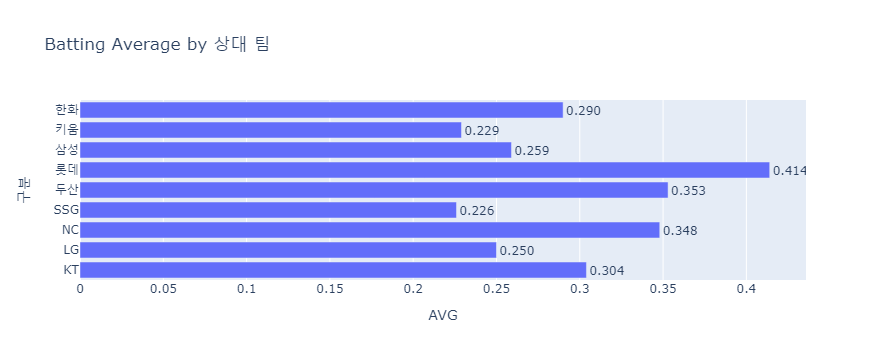

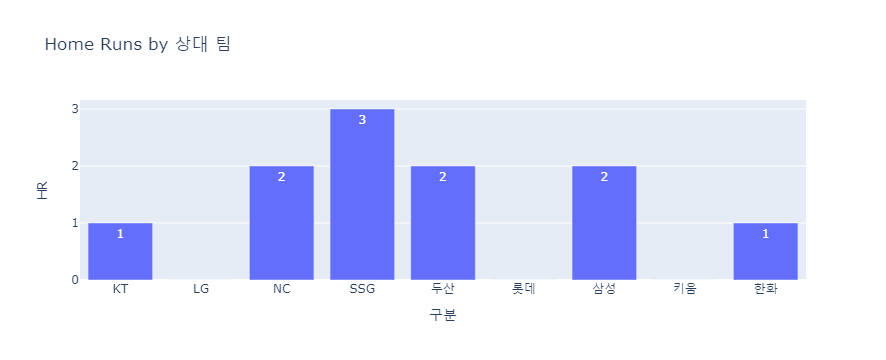

In [50]:
# 최형우 상대 팀 별 타율 및 홈런 갯수 시각화

fig = px.bar(최형우_경기별기록_상대팀별, y=최형우_경기별기록_상대팀별['구분'], x=최형우_경기별기록_상대팀별['AVG'], text='AVG', title='Batting Average by 상대 팀',
             labels={'타율': '타율'})
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

fig = px.bar(최형우_경기별기록_상대팀별, x=최형우_경기별기록_상대팀별['구분'], y=최형우_경기별기록_상대팀별['HR'], text='HR', title='Home Runs by 상대 팀',
             labels={'홈런': '홈런'})
fig.show()

###  이번 시즌 전반기를 끝낸 시점의 최형우는 3할 근처의 타율과 두 자릿 수 홈런을 넘기는 등 에이징 커브가 무색한 퍼포먼스를 내고 있다. 특히 롯데와 상대할 땐 4할이 넘는 타율을 마크하고 있으며, 홈런 또한 몇몇 팀을 제외하곤 대체로 골고루 때려내고 있음을 알 수 있다.

### 구장별 기록

In [39]:
최형우_경기별기록_구장별 = 최형우_경기별기록[9:17]
최형우_경기별기록_구장별

,구분,G,AVG,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP
9,고척,5,0.200,21,20,0,4,0,0,0,0,0,0,1,0,5,1
10,광주,37,0.276,151,127,19,35,7,0,7,23,0,0,20,3,30,1
11,대구,2,0.222,10,9,2,2,0,0,0,1,0,0,1,0,1,0
12,대전,6,0.300,26,20,3,6,2,1,1,5,0,0,5,1,3,0
13,문학,4,0.273,15,11,5,3,0,0,2,4,0,0,4,0,4,0
14,사직,6,0.381,26,21,5,8,2,0,0,3,0,0,5,0,5,0
15,수원,3,0.455,12,11,2,5,1,0,0,2,0,0,1,0,3,0
16,잠실,12,0.326,54,46,4,15,3,0,1,8,0,0,6,2,6,0


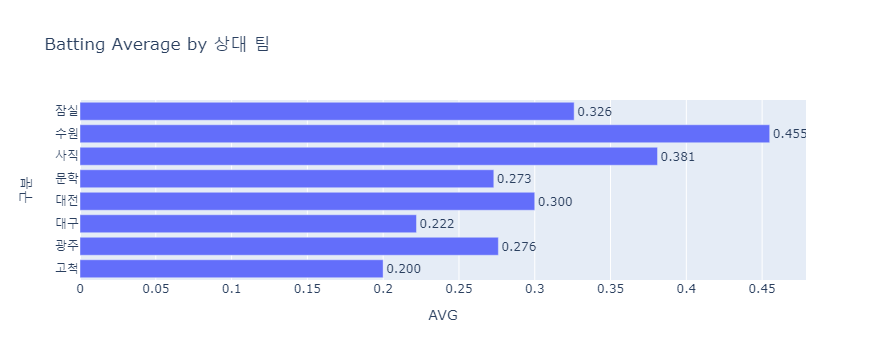

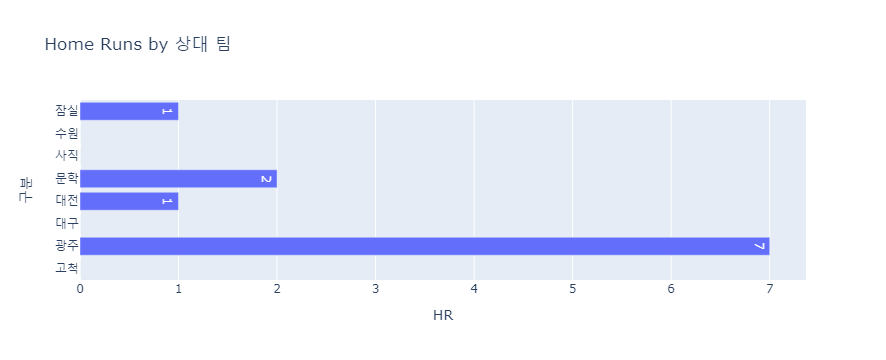

In [49]:
# 최형우 구장별 타율 및 홈런 갯수 시각화

fig = px.bar(최형우_경기별기록_구장별, y=최형우_경기별기록_구장별['구분'], x=최형우_경기별기록_구장별['AVG'], text='AVG', title='Batting Average by 상대 팀',
             labels={'타율': '타율'})
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

fig = px.bar(최형우_경기별기록_구장별, y=최형우_경기별기록_구장별['구분'], x=최형우_경기별기록_구장별['HR'], text='HR', title='Home Runs by 상대 팀',
             labels={'홈런': '홈런'})
fig.show()

### 월별 기록

In [40]:
최형우_경기별기록_월별 = 최형우_경기별기록[17:21]
최형우_경기별기록_월별

,구분,G,AVG,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP
17,3~4월,22,0.316,89,76,11,24,5,0,3,12,0,0,12,1,14,2
18,5월,21,0.324,91,74,11,24,5,1,2,15,0,0,14,2,13,0
19,6월,23,0.262,96,84,10,22,4,0,4,14,0,0,11,1,22,0
20,7월,9,0.258,39,31,8,8,1,0,2,5,0,0,6,2,8,0


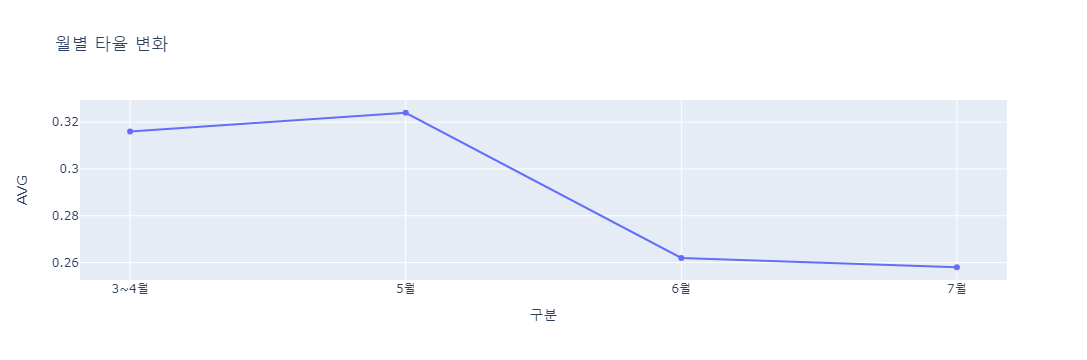

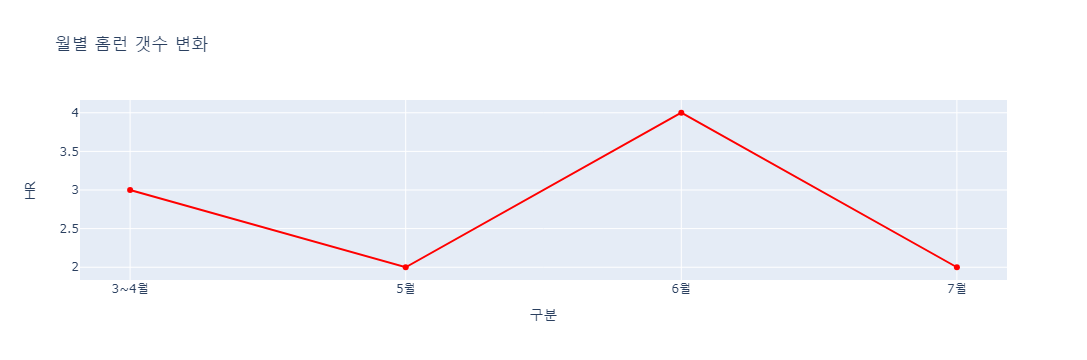

In [62]:
# 월별 타율 변화와 홈런의 갯수 변화 확인

fig = px.line(최형우_경기별기록_월별, x=최형우_경기별기록_월별['구분'], y=최형우_경기별기록_월별['AVG'], title='월별 타율 변화',
              labels={'타율': '타율'})
fig.update_traces(mode='markers+lines')
fig.show()

fig = px.line(최형우_경기별기록_월별, x=최형우_경기별기록_월별['구분'], y=최형우_경기별기록_월별['HR'], title='월별 홈런 갯수 변화',
              labels={'홈런': '홈런'})
fig.update_traces(mode='markers+lines', line_color='red')
fig.show()

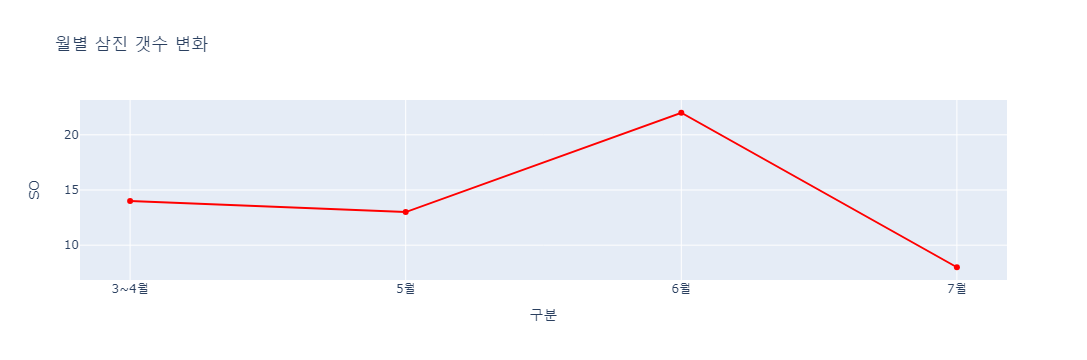

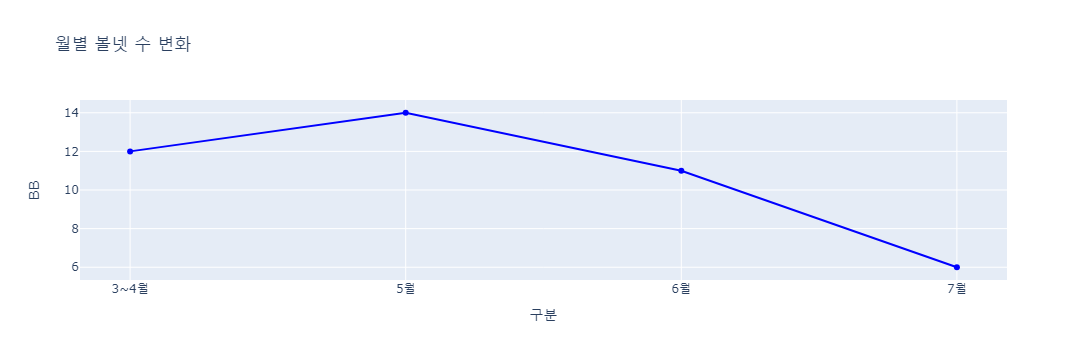

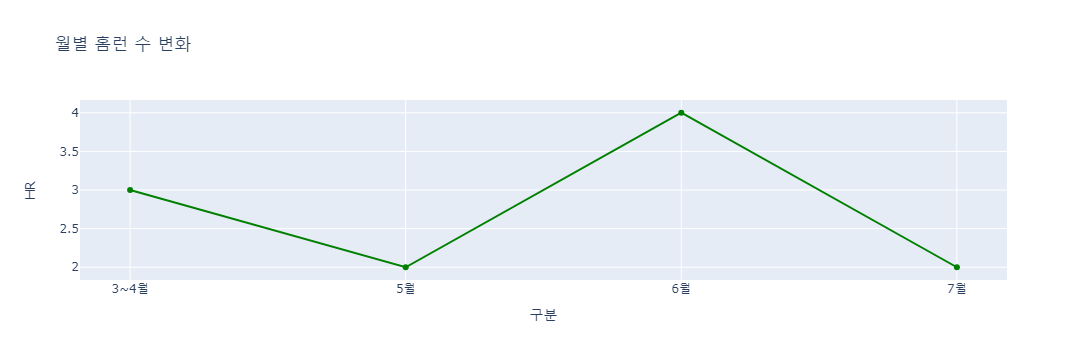

In [64]:
# 월별 삼진과 볼넷 변화와 홈런의 갯수 변화 확인

fig = px.line(최형우_경기별기록_월별, x=최형우_경기별기록_월별['구분'], y=최형우_경기별기록_월별['SO'], title='월별 삼진 갯수 변화',
              labels={'삼진': '삼진'})
fig.update_traces(mode='markers+lines', line_color='red')
fig.show()

fig = px.line(최형우_경기별기록_월별, x=최형우_경기별기록_월별['구분'], y=최형우_경기별기록_월별['BB'], title='월별 볼넷 수 변화',
              labels={'볼넷': '볼넷'})
fig.update_traces(mode='markers+lines', line_color='blue')
fig.show()

fig = px.line(최형우_경기별기록_월별, x=최형우_경기별기록_월별['구분'], y=최형우_경기별기록_월별['HR'], title='월별 홈런 수 변화',
              labels={'홈런': '홈런'})
fig.update_traces(mode='markers+lines', line_color='green')
fig.show()

### 아직 전반기를 마친 시점이라 표본이 크진 않지만 위 그래프를 보면 3~5월에 비해 6월에 삼진 갯수가 많아지고 볼넷을 얻어내는 횟수가 점점 줄어들었다. 반면에 홈런 갯수가 증가한 것을 확인할 수 있다. 이러한 변화를 통해 유추할 수 있는 것은 6월 팀 사정이 그리 좋지 못했을 때 최형우가 타점으로 해결해야하는 상황이 많이 놓였고 홈런을 쳐야하는 부담을 받았을 가능성이 높다고 생각할 수 있다. 즉 최형우가 상황에 따른 타격이 가능한 타자라는 것을 여실히 보여준다.

### 요일별 기록

In [41]:
최형우_경기별기록_요일별 = 최형우_경기별기록[21:27]
최형우_경기별기록_요일별

,구분,G,AVG,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP
21,화,12,0.326,51,43,8,14,5,1,2,8,0,0,7,1,8,0
22,수,14,0.283,57,46,7,13,4,0,1,6,0,0,9,2,10,0
23,목,10,0.182,42,33,5,6,0,0,2,5,0,0,9,0,12,0
24,금,12,0.326,51,46,6,15,1,0,3,11,0,0,4,1,9,0
25,토,14,0.320,62,50,8,16,3,0,1,8,0,0,9,2,10,0
26,일,13,0.298,52,47,6,14,2,0,2,8,0,0,5,0,8,2


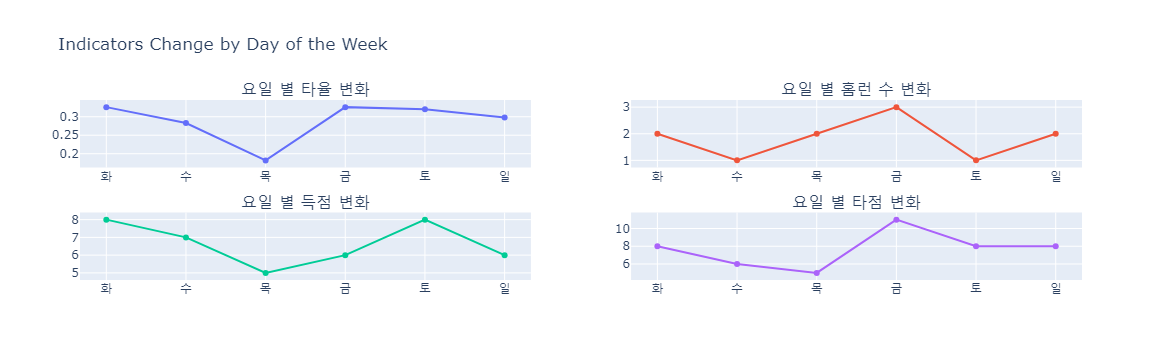

In [66]:
# 요일별 지표 변화

# subplots 생성
fig = make_subplots(rows=2, cols=2, subplot_titles=('요일 별 타율 변화', '요일 별 홈런 수 변화', '요일 별 득점 변화', '요일 별 타점 변화'))

# Plotting AVG - 타율
fig.add_trace(go.Scatter(x=최형우_경기별기록_요일별['구분'], y=최형우_경기별기록_요일별['AVG'], mode='lines+markers', name='타율'), row=1, col=1)

# Plotting HR - 홈런
fig.add_trace(go.Scatter(x=최형우_경기별기록_요일별['구분'], y=최형우_경기별기록_요일별['HR'], mode='lines+markers', name='홈런'), row=1, col=2)

# Plotting R - 득점
fig.add_trace(go.Scatter(x=최형우_경기별기록_요일별['구분'], y=최형우_경기별기록_요일별['R'], mode='lines+markers', name='득점'), row=2, col=1)

# Plotting RBI - 타점
fig.add_trace(go.Scatter(x=최형우_경기별기록_요일별['구분'], y=최형우_경기별기록_요일별['RBI'], mode='lines+markers', name='타점'), row=2, col=2)

# Update layout
fig.update_layout(title_text='Indicators Change by Day of the Week', showlegend=False)

# Show the plot
fig.show()

### 주 초반부터 목요일까지 전반적인 지표들이 떨어지다가 목요일을 전환점으로 다시 오르는 것을 확인할 수 있음. 주중 경기 그 중에서도 목요일 경기는 지명타자 등으로 체력 안배가 필요해 보임.

## 상황 별 기록

In [73]:
최형우_상황별기록 = pd.read_csv('72443상황별기록.csv') # 0~10, 10~22, 22~35, 35~40
최형우_상황별기록

,구분,AVG,AB,H,2B,3B,HR,RBI,BB,HBP,SO,GDP
0,주자없음,0.260,131,34,10,1,6,6,16,4,30,0
1,1루,0.303,66,20,4,0,2,6,12,0,14,1
2,2루,0.400,20,8,1,0,0,6,3,0,5,0
3,3루,0.222,9,2,0,0,0,2,3,0,2,0
4,"1,2루",0.474,19,9,0,0,2,13,4,0,0,1
5,"1,3루",0.100,10,1,0,0,1,4,1,0,2,0
6,"2,3루",0.500,2,1,0,0,0,1,3,1,1,0
7,만루,0.375,8,3,0,0,0,8,1,1,3,0
8,주자있음,0.328,134,44,5,0,5,40,27,2,27,2
9,득점권,0.353,68,24,1,0,3,34,15,2,13,1


### 데이터프레임 상황별 나누기

In [74]:
최형우_상황별기록_주자상황별 = 최형우_상황별기록[:10]
최형우_상황별기록_볼카운트별 = 최형우_상황별기록[10:22]
최형우_상황별기록_이닝별 = 최형우_상황별기록[22:35]
최형우_상황별기록_타순별 = 최형우_상황별기록[35:40]
최형우_상황별기록_투수유형별 = 최형우_상황별기록[40:43]
최형우_상황별기록_아웃카운트별 = 최형우_상황별기록[43:46]

### 주자상황별

In [89]:
최형우_상황별기록_주자상황별

,구분,AVG,AB,H,2B,3B,HR,RBI,BB,HBP,SO,GDP
0,주자없음,0.260,131,34,10,1,6,6,16,4,30,0
1,1루,0.303,66,20,4,0,2,6,12,0,14,1
2,2루,0.400,20,8,1,0,0,6,3,0,5,0
3,3루,0.222,9,2,0,0,0,2,3,0,2,0
4,"1,2루",0.474,19,9,0,0,2,13,4,0,0,1
5,"1,3루",0.100,10,1,0,0,1,4,1,0,2,0
6,"2,3루",0.500,2,1,0,0,0,1,3,1,1,0
7,만루,0.375,8,3,0,0,0,8,1,1,3,0
8,주자있음,0.328,134,44,5,0,5,40,27,2,27,2
9,득점권,0.353,68,24,1,0,3,34,15,2,13,1


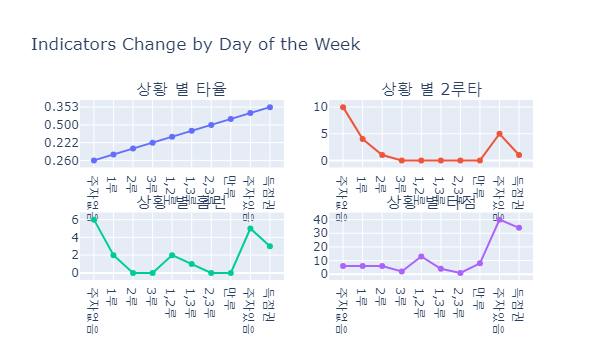

In [107]:
# 주자상황별 지표 변화
# subplots 생성
fig = make_subplots(rows=2, cols=2, subplot_titles=('상황 별 타율', '상황 별 2루타', '상황 별 홈런', '상황 별 타점'))

# Plotting HR - 타율
fig.add_trace(go.Scatter(x=최형우_상황별기록_주자상황별['구분'], y=최형우_상황별기록_주자상황별['AVG'], mode='lines+markers', name='타율'), row=1, col=1)

# Plotting HR - 2루타
fig.add_trace(go.Scatter(x=최형우_상황별기록_주자상황별['구분'], y=최형우_상황별기록_주자상황별['2B'], mode='lines+markers', name='홈런'), row=1, col=2)

# Plotting R - 홈런
fig.add_trace(go.Scatter(x=최형우_상황별기록_주자상황별['구분'], y=최형우_상황별기록_주자상황별['HR'], mode='lines+markers', name='득점'), row=2, col=1)

# Plotting RBI - 타점
fig.add_trace(go.Scatter(x=최형우_상황별기록_주자상황별['구분'], y=최형우_상황별기록_주자상황별['RBI'], mode='lines+markers', name='타점'), row=2, col=2)

# Update layout
fig.update_layout(title_text='Indicators Change by Day of the Week', showlegend=False)

# Show the plot
fig.show()